In [1]:
# 1️⃣ 데이터 분리 (X, y)
# 2️⃣ 결측치 최소 처리 (drop or fillna)
# 3️⃣ 인코딩 (문자열 → 숫자)
# 4️⃣ 기본 모델 학습 (Logistic Regression or Neural Net)
# 5️⃣ 성능 확인 (train/test split)

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import missingno as msno

In [2]:
pd.set_option('display.max_columns', None)  # 전체 컬럼 출력
pd.set_option('display.max_rows', None) 

In [3]:
train = pd.read_csv('train.csv') 

In [4]:
print(train.shape)

(891, 12)


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

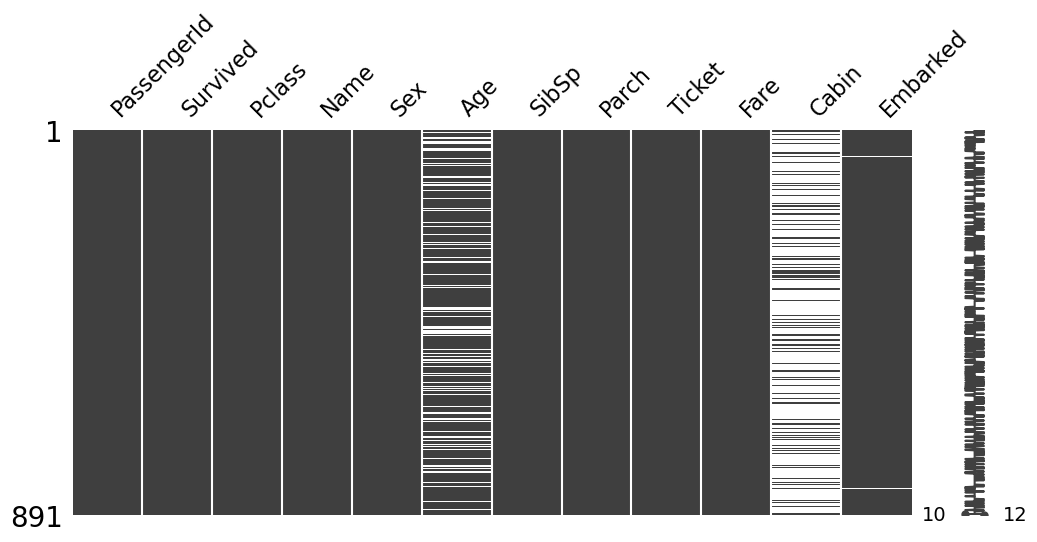

In [16]:
msno.matrix(train, figsize=(12, 5))

In [ ]:
#Survived
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

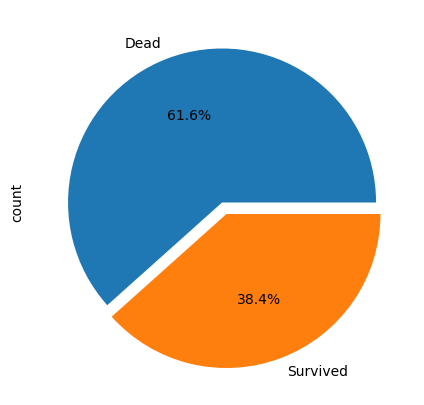

In [15]:
plt.figure(figsize=(8,5))
labels = ['Dead','Survived']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], 
                                          autopct='%1.1f%%', #몇퍼인지도 표시
                                          labels=labels)

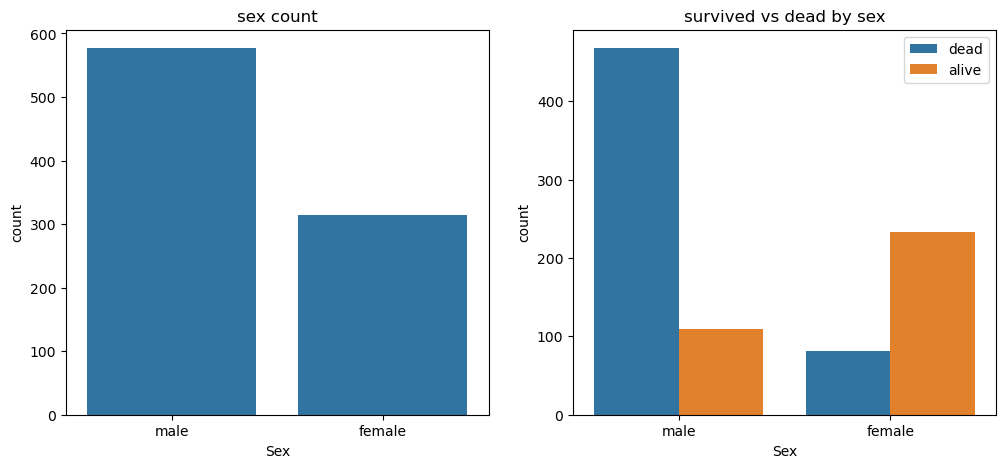

In [18]:
#Sex
fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].set_title("sex count")
sns.countplot(x="Sex",data=train, ax=axes[0])

axes[1].set_title("survived vs dead by sex")
sns.countplot(x="Sex",hue="Survived",data=train,ax=axes[1])
axes[1].legend(labels = ['dead','alive'])

,Survived
Sex,
female,0.742038
male,0.188908


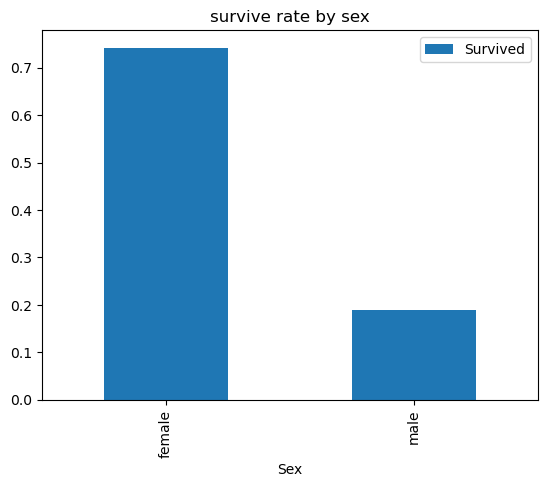

In [23]:
#성별에 따른 생존률
survived_rate = train[['Sex','Survived']].groupby('Sex').mean().plot.bar()
survived_rate.set_title("survive rate by sex")
train[['Sex','Survived']].groupby('Sex').mean()